In [290]:
import pandas as pd
import numpy as numpy
import json 
import os 
import pylab as pl
import urllib
import requests
import geopandas as gp
import fiona
import shapely
from fiona.crs import from_epsg
import os
import pandas as pd
import urllib
import requests
import json
import sys
import io
import shapely
import base64
import urllib.request
import functools
import geopandas as gp
import fiona
import numpy as np

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
%matplotlib inline

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [291]:
myAPI = '90341a28f02794c77f6e3abb153a4952a0bb480b'

In [292]:
path = '/Users/katharinevoorhees/CAPSTONE/nyu_2451_34504/nyu_2451_34504.shp'

cent = gp.GeoDataFrame.from_file(path)

In [293]:
url = 'https://data.cityofnewyork.us/api/geospatial/78dh-3ptz?method=export&format=Shapefile'
precinct = gp.GeoDataFrame.from_file(url)

In [294]:
cent.crs

{'init': 'epsg:2263'}

In [295]:
precinct.to_crs(epsg=2263, inplace=True)

In [296]:
precinct.crs

{'init': 'epsg:2263', 'no_defs': True}

In [297]:
tract_precinct_key = gp.sjoin(precinct, cent, how='right')
tract_precinct_key.head()

/Users/katharinevoorhees/anaconda3/lib/python3.6/site-packages/geopandas/tools/sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


,index_left,precinct,shape_area,shape_leng,tractid,tractnum,pop2010,bcode,latitude,longitude,notes,geometry
index_right,,,,,,,,,,,,
1146,0.0,1.0,4.730176e+07,80586.154615,36061004700,004700,2524,36061,40.722822,-74.002908,None,POINT (983443.9433806153 202620.0980203369)
1148,0.0,1.0,4.730176e+07,80586.154615,36061004900,004900,4942,36061,40.725560,-74.001095,None,POINT (983946.4939007206 203617.6245483772)
1137,0.0,1.0,4.730176e+07,80586.154615,36061003700,003700,2447,36061,40.726366,-74.005906,None,POINT (982613.0270853047 203911.3286135447)
1100,0.0,1.0,4.730176e+07,80586.154615,36061000100,000100,2,36061,40.689913,-74.045313,None,POINT (971683.6733778832 190633.5974260385)
1103,0.0,1.0,4.730176e+07,80586.154615,36061000500,000500,0,36061,40.690306,-74.017891,None,POINT (979288.447400425 190774.0353064164)


In [298]:
nan = tract_precinct_key[tract_precinct_key['precinct'].isnull()]

In [299]:
nan

,index_left,precinct,shape_area,shape_leng,tractid,tractnum,pop2010,bcode,latitude,longitude,notes,geometry
index_right,,,,,,,,,,,,
337,NaN,NaN,NaN,NaN,36005050400,050400,39,36005,40.868858,-73.776389,Centroid outside tract bndy in water,POINT (1046095.930934304 255905.0228903452)
897,NaN,NaN,NaN,NaN,36047070203,070203,0,36047,40.609131,-73.865840,None,POINT (1021500.685126105 161227.7647557726)
1099,NaN,NaN,NaN,NaN,36047990100,990100,0,36047,40.564993,-74.014886,Tract consists entirely of water,POINT (980114.0389845355 145119.0058747189)
1184,NaN,NaN,NaN,NaN,36061008602,008602,0,36061,40.749757,-73.966238,None,POINT (993604.5681223959 212435.1566397618)
2056,NaN,NaN,NaN,NaN,36081990100,990100,0,36081,40.540173,-73.890969,Tract consists entirely of water,POINT (1014554.675167346 136094.9913464744)
2166,NaN,NaN,NaN,NaN,36085990100,990100,0,36085,40.525551,-74.108582,Tract consists entirely of water,POINT (954063.5189915892 130767.7026128899)


In [300]:
nan.drop([2056,2166,1099], inplace=True)
nan

/Users/katharinevoorhees/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,index_left,precinct,shape_area,shape_leng,tractid,tractnum,pop2010,bcode,latitude,longitude,notes,geometry
index_right,,,,,,,,,,,,
337,NaN,NaN,NaN,NaN,36005050400,050400,39,36005,40.868858,-73.776389,Centroid outside tract bndy in water,POINT (1046095.930934304 255905.0228903452)
897,NaN,NaN,NaN,NaN,36047070203,070203,0,36047,40.609131,-73.865840,None,POINT (1021500.685126105 161227.7647557726)
1184,NaN,NaN,NaN,NaN,36061008602,008602,0,36061,40.749757,-73.966238,None,POINT (993604.5681223959 212435.1566397618)


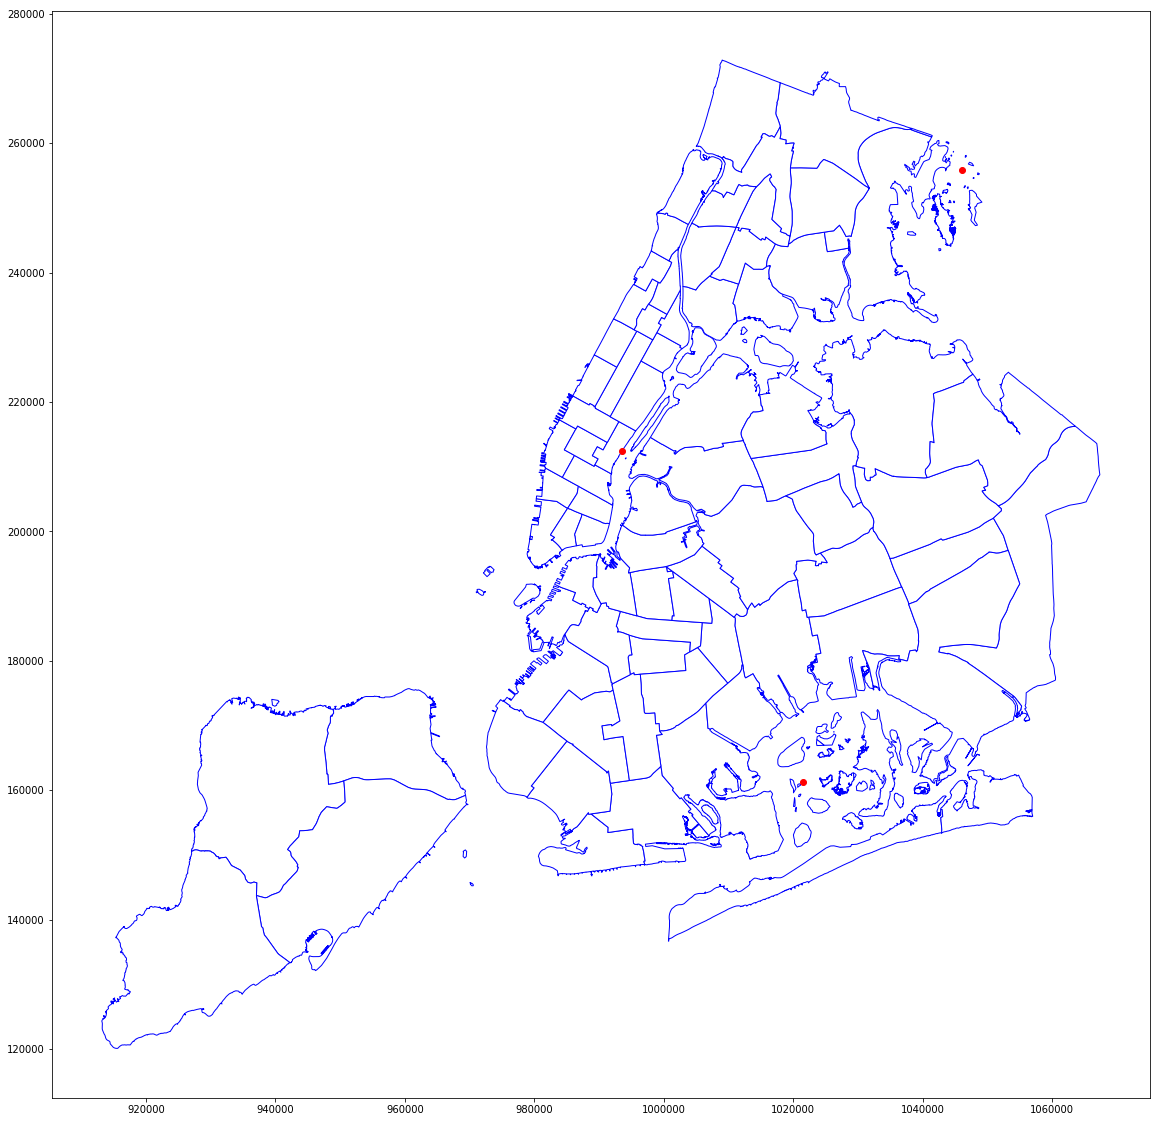

In [301]:
ax = precinct.plot(facecolor='w', edgecolor='b', figsize=(20,20))
nan.plot(color='r', ax=ax);

In [302]:
tract_precinct_key.reset_index(inplace=True)

In [303]:
tract_precinct_key.at[2161, 'precinct'] = 45
tract_precinct_key.at[2162,'precinct'] = 69
tract_precinct_key.at[2164, 'precinct'] = 17

In [304]:
tract_precinct_key.tail()

,index_right,index_left,precinct,shape_area,shape_leng,tractid,tractnum,pop2010,bcode,latitude,longitude,notes,geometry
2162,897,NaN,69.0,NaN,NaN,36047070203,070203,0,36047,40.609131,-73.865840,None,POINT (1021500.685126105 161227.7647557726)
2163,1099,NaN,NaN,NaN,NaN,36047990100,990100,0,36047,40.564993,-74.014886,Tract consists entirely of water,POINT (980114.0389845355 145119.0058747189)
2164,1184,NaN,17.0,NaN,NaN,36061008602,008602,0,36061,40.749757,-73.966238,None,POINT (993604.5681223959 212435.1566397618)
2165,2056,NaN,NaN,NaN,NaN,36081990100,990100,0,36081,40.540173,-73.890969,Tract consists entirely of water,POINT (1014554.675167346 136094.9913464744)
2166,2166,NaN,NaN,NaN,NaN,36085990100,990100,0,36085,40.525551,-74.108582,Tract consists entirely of water,POINT (954063.5189915892 130767.7026128899)


In [305]:
tract_precinct_key.to_csv('tract_precinct_key.csv')

### let's get to reading in the acs data! (woo!)

In [306]:
url = "https://api.census.gov/data/2016/acs/acs5/variables.json"
resp = requests.request('GET', url)
aff1y = json.loads(resp.text)

affkeys = np.array(list(aff1y['variables'].keys()))


In [307]:
[(k, aff1y['variables'][k]['label'])  for k in affkeys if k.startswith ('B19013') ]

[('B19013G_001E',
  'Estimate!!Median household income in the past 12 months (in 2016 inflation-adjusted dollars)'),
 ('B19013E_001E',
  'Estimate!!Median household income in the past 12 months (in 2016 inflation-adjusted dollars)'),
 ('B19013D_001E',
  'Estimate!!Median household income in the past 12 months (in 2016 inflation-adjusted dollars)'),
 ('B19013F_001E',
  'Estimate!!Median household income in the past 12 months (in 2016 inflation-adjusted dollars)'),
 ('B19013A_001E',
  'Estimate!!Median household income in the past 12 months (in 2016 inflation-adjusted dollars)'),
 ('B19013I_001E',
  'Estimate!!Median household income in the past 12 months (in 2016 inflation-adjusted dollars)'),
 ('B19013_001E',
  'Estimate!!Median household income in the past 12 months (in 2016 inflation-adjusted dollars)'),
 ('B19013B_001E',
  'Estimate!!Median household income in the past 12 months (in 2016 inflation-adjusted dollars)'),
 ('B19013H_001E',
  'Estimate!!Median household income in the pas

In [308]:
key1= 'B01001_001E,B01001_002E,B01001_026E,B01001_005E,B01001_006E,B01001_007E,B01001_008E,'
key2 = 'B01001_009E,B01001_010E,B01001_011E,B01001_012E,B01001_013E,B01001_014E,B01001_015E,'
key3= 'B01001_016E,B01001_017E,B01001_018E,B01001_019E,B01001_020E,B01001_021E,B01001_022E,'
key4= 'B01001_023E,B01001_024E,B01001_025E,B01001_027E,B01001_028E,B01001_029E,B01001_030E,'
key5=  'B01001_031E,B01001_032E,B01001_033E,B01001_034E,B01001_035E,B01001_036E,'
key6= 'B01001_037E,B01001_038E,B01001_039E,B01001_040E,B01001_041E,B01001_042E,'
key7= 'B01001_043E,B01001_044E,B01001_045E,B01001_046E,B01001_047E,B01001_048E,B01001_049E'
key8= 'B01001B_006E,B01001B_007E,B01001B_008E,B01001B_009E,B01001B_010E,B01001B_011E'

In [309]:
keys = {'B01001_001E':'total_pop','B01001_002E': 'total_male', 'B01001_026E':'total_female', 'B01001_005E': 
        'm_10_14', 'B01001_006E': 'm_15_17', 'B01001_007E':'m_18_19', 'B01001_008E': 'm_20', 'B01001_009E':'m_21', 
        'B01001_010E':'m_22_24','B01001_011E':'m_25_29', 'B01001_012E':'m_30_34', 'B01001_013E':'m_35_39', 
        'B01001_014E': 'm_40_44', 'B01001_015E':'m_45_49', 'B01001_016E':'m_50_54', 
        'B01001_017E': 'm_55_59' , 'B01001_018E':'m_60_61', 'B01001_019E': 'm_62_64', 'B01001_020E': 'm_65_66', 
        'B01001_021E': 'm_67_69','B01001_022E': 'm_70_74', 'B01001_023E': 'm_75_79', 
        'B01001_024E':'m_80_84', 'B01001_025E': 'm_85plus','B01001_027E': 'f_under5', 'B01001_028E': 'f_5_9','B01001_029E': 'f_10_14',
        'B01001_030E': 'f_15_17', 
        'B01001_031E':'f_18_19', 'B01001_032E': 'f_20', 'B01001_033E':'f_21', 'B01001_034E':'f_22_24',
        'B01001_035E':'f_25_29', 'B01001_036E':'f_30_34', 
        'B01001_037E':'f_35_39', 'B01001_038E': 'f_40_44', 'B01001_039E':'f_45_49', 'B01001_040E':'f_50_54', 
        'B01001_041E': 'f_55_59' , 'B01001_042E':'f_60_61', 'B01001_043E': 'f_62_64', 'B01001_044E': 'f_65_66', 
        'B01001_045E': 'f_67_69', 'B01001_046E': 'f_70_74', 'B01001_047E': 'f_75_79', 
        'B01001_048E':'f_80_84', 'B01001_049E': 'f_85plus', 'B01001B_006E': 'Bm_15_17', 'B01001B_007E':
        'Bm_18_19', 
        'B01001B_008E': 'Bm_20_24','B01001B_009E':'Bm_25_29', 
        'B01001B_010E':'Bm_30_34', 'B01001B_011E':'Bm_35_44'}

In [310]:
year = '2017'

counties = [ 5, 47, 61, 81, 85]

url = "https://api.census.gov/data/" + year + "/acs/acs5?get=" +key8+\
    ",NAME&for=tract:*&in=state:36&in=county:*&key=" + myAPI
resp = requests.request('GET', url).content
acs_age2 = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))

acs_age2 = acs_age2[acs_age2['county'].isin(counties)]


acs_age2.head(1)

,B01001B_006E,B01001B_007E,B01001B_008E,B01001B_009E,B01001B_010E,B01001B_011E,NAME,state,county,tract,Unnamed: 10
0,0,0,0,0,0,0,"Census Tract 119, Queens County, New York",36,81,11900,NaN


In [311]:
acs_age = acs_age[acs_age['county'].isin(counties)]

acs_age.head()

,B01001_001E,B01001_002E,B01001_026E,B01001_005E,B01001_006E,B01001_007E,B01001_008E,B01001_009E,B01001_010E,B01001_011E,B01001_012E,B01001_013E,B01001_014E,B01001_015E,B01001_016E,B01001_017E,B01001_018E,B01001_019E,B01001_020E,B01001_021E,B01001_022E,B01001_023E,B01001_024E,B01001_025E,B01001_027E,B01001_028E,B01001_029E,B01001_030E,B01001_031E,B01001_032E,B01001_033E,B01001_034E,B01001_035E,B01001_036E,B01001_037E,B01001_038E,B01001_039E,B01001_040E,B01001_041E,B01001_042E,B01001_043E,B01001_044E,B01001_045E,B01001_046E,B01001_047E,B01001_048E,B01001_049E,NAME,state,county,tract,Unnamed: 51
0,1565,808,757,31,10,4,0,20,74,114,142,67,52,77,44,35,13,5,0,22,0,16,6,15,21,37,24,5,4,0,24,33,177,85,42,47,43,68,25,17,0,17,20,23,5,0,40,"Census Tract 119, Queens County, New York",36,81,11900,NaN
1,1607,811,796,48,16,20,6,24,11,37,89,51,54,38,52,71,6,20,15,25,4,45,32,12,13,19,40,38,19,0,5,25,71,57,50,52,49,72,23,49,16,24,24,38,55,40,17,"Census Tract 135, Queens County, New York",36,81,13500,NaN
2,1981,922,1059,19,0,38,0,0,15,82,55,74,81,30,82,136,26,7,23,48,45,19,17,15,31,28,74,31,46,0,0,27,55,47,132,90,44,49,86,21,69,61,52,36,20,33,27,"Census Tract 136, Queens County, New York",36,81,13600,NaN
3,1822,1042,780,46,55,5,6,0,27,173,227,133,39,76,41,43,15,25,2,0,7,13,7,0,38,16,34,8,13,0,6,89,189,97,40,51,41,37,13,7,29,22,6,20,10,14,0,"Census Tract 141, Queens County, New York",36,81,14100,NaN
4,2267,1203,1064,90,14,12,0,0,11,148,129,111,96,14,87,79,45,3,35,56,36,45,30,6,45,26,53,28,21,13,4,29,93,91,108,62,39,59,103,44,23,27,42,28,44,51,31,"Census Tract 145, Queens County, New York",36,81,14500,NaN


In [312]:
acs_age2.head()


,B01001B_006E,B01001B_007E,B01001B_008E,B01001B_009E,B01001B_010E,B01001B_011E,NAME,state,county,tract,Unnamed: 10
0,0,0,0,0,0,0,"Census Tract 119, Queens County, New York",36,81,11900,NaN
1,0,0,0,0,0,0,"Census Tract 135, Queens County, New York",36,81,13500,NaN
2,0,0,0,0,0,6,"Census Tract 136, Queens County, New York",36,81,13600,NaN
3,0,0,0,0,0,9,"Census Tract 141, Queens County, New York",36,81,14100,NaN
4,7,0,0,15,0,0,"Census Tract 145, Queens County, New York",36,81,14500,NaN


In [313]:
AGE_ACS = acs_age.merge(acs_age2, on=['county','tract'])

In [314]:
AGE_ACS.head()

,B01001_001E,B01001_002E,B01001_026E,B01001_005E,B01001_006E,B01001_007E,B01001_008E,B01001_009E,B01001_010E,B01001_011E,B01001_012E,B01001_013E,B01001_014E,B01001_015E,B01001_016E,B01001_017E,B01001_018E,B01001_019E,B01001_020E,B01001_021E,B01001_022E,B01001_023E,B01001_024E,B01001_025E,B01001_027E,B01001_028E,B01001_029E,B01001_030E,B01001_031E,B01001_032E,B01001_033E,B01001_034E,B01001_035E,B01001_036E,B01001_037E,B01001_038E,B01001_039E,B01001_040E,B01001_041E,B01001_042E,B01001_043E,B01001_044E,B01001_045E,B01001_046E,B01001_047E,B01001_048E,B01001_049E,NAME_x,state_x,county,tract,Unnamed: 51,B01001B_006E,B01001B_007E,B01001B_008E,B01001B_009E,B01001B_010E,B01001B_011E,NAME_y,state_y,Unnamed: 10
0,1565,808,757,31,10,4,0,20,74,114,142,67,52,77,44,35,13,5,0,22,0,16,6,15,21,37,24,5,4,0,24,33,177,85,42,47,43,68,25,17,0,17,20,23,5,0,40,"Census Tract 119, Queens County, New York",36,81,11900,NaN,0,0,0,0,0,0,"Census Tract 119, Queens County, New York",36,NaN
1,1607,811,796,48,16,20,6,24,11,37,89,51,54,38,52,71,6,20,15,25,4,45,32,12,13,19,40,38,19,0,5,25,71,57,50,52,49,72,23,49,16,24,24,38,55,40,17,"Census Tract 135, Queens County, New York",36,81,13500,NaN,0,0,0,0,0,0,"Census Tract 135, Queens County, New York",36,NaN
2,1981,922,1059,19,0,38,0,0,15,82,55,74,81,30,82,136,26,7,23,48,45,19,17,15,31,28,74,31,46,0,0,27,55,47,132,90,44,49,86,21,69,61,52,36,20,33,27,"Census Tract 136, Queens County, New York",36,81,13600,NaN,0,0,0,0,0,6,"Census Tract 136, Queens County, New York",36,NaN
3,1822,1042,780,46,55,5,6,0,27,173,227,133,39,76,41,43,15,25,2,0,7,13,7,0,38,16,34,8,13,0,6,89,189,97,40,51,41,37,13,7,29,22,6,20,10,14,0,"Census Tract 141, Queens County, New York",36,81,14100,NaN,0,0,0,0,0,9,"Census Tract 141, Queens County, New York",36,NaN
4,2267,1203,1064,90,14,12,0,0,11,148,129,111,96,14,87,79,45,3,35,56,36,45,30,6,45,26,53,28,21,13,4,29,93,91,108,62,39,59,103,44,23,27,42,28,44,51,31,"Census Tract 145, Queens County, New York",36,81,14500,NaN,7,0,0,15,0,0,"Census Tract 145, Queens County, New York",36,NaN


In [315]:
AGE_ACS.rename(columns=keys, inplace=True)

In [316]:
path= '/Users/katharinevoorhees/patrol_allocation/tract_precinct_key.csv'
prec_key = pd.read_csv(path)

In [317]:
prec_key['bcode'] = prec_key['bcode'].astype('str')

In [318]:
prec_key.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 14 columns):
Unnamed: 0     2167 non-null int64
index_right    2167 non-null int64
index_left     2161 non-null float64
precinct       2164 non-null float64
shape_area     2161 non-null float64
shape_leng     2161 non-null float64
tractid        2167 non-null int64
tractnum       2167 non-null int64
pop2010        2167 non-null int64
bcode          2167 non-null object
latitude       2167 non-null float64
longitude      2167 non-null float64
notes          11 non-null object
geometry       2167 non-null object
dtypes: float64(6), int64(5), object(3)
memory usage: 237.1+ KB


In [319]:
prec_key['cnty_num'] = prec_key['bcode'].str.slice(-3,)
prec_key.head()

,Unnamed: 0,index_right,index_left,precinct,shape_area,shape_leng,tractid,tractnum,pop2010,bcode,latitude,longitude,notes,geometry,cnty_num
0,0,1146,0.0,1.0,4.730176e+07,80586.154615,36061004700,4700,2524,36061,40.722822,-74.002908,NaN,POINT (983443.9433806153 202620.0980203369),061
1,1,1148,0.0,1.0,4.730176e+07,80586.154615,36061004900,4900,4942,36061,40.725560,-74.001095,NaN,POINT (983946.4939007206 203617.6245483772),061
2,2,1137,0.0,1.0,4.730176e+07,80586.154615,36061003700,3700,2447,36061,40.726366,-74.005906,NaN,POINT (982613.0270853047 203911.3286135447),061
3,3,1100,0.0,1.0,4.730176e+07,80586.154615,36061000100,100,2,36061,40.689913,-74.045313,NaN,POINT (971683.6733778832 190633.5974260385),061
4,4,1103,0.0,1.0,4.730176e+07,80586.154615,36061000500,500,0,36061,40.690306,-74.017891,NaN,POINT (979288.447400425 190774.0353064164),061


In [320]:
prec_key['cnty_num'] = prec_key['cnty_num'].astype('int')

In [321]:
AGE_ACS_PRECINT = AGE_ACS.merge(prec_key, how='left',left_on=['county','tract'], 
                                right_on=['cnty_num','tractnum'] )
AGE_ACS_PRECINT.tail()

,total_pop,total_male,total_female,m_10_14,m_15_17,m_18_19,m_20,m_21,m_22_24,m_25_29,m_30_34,m_35_39,m_40_44,m_45_49,m_50_54,m_55_59,m_60_61,m_62_64,m_65_66,m_67_69,m_70_74,m_75_79,m_80_84,m_85plus,f_under5,f_5_9,f_10_14,f_15_17,f_18_19,f_20,f_21,f_22_24,f_25_29,f_30_34,f_35_39,f_40_44,f_45_49,f_50_54,f_55_59,f_60_61,f_62_64,f_65_66,f_67_69,f_70_74,f_75_79,f_80_84,f_85plus,NAME_x,state_x,county,tract,Unnamed: 51,Bm_15_17,Bm_18_19,Bm_20_24,Bm_25_29,Bm_30_34,Bm_35_44,NAME_y,state_y,Unnamed: 10,Unnamed: 0,index_right,index_left,precinct,shape_area,shape_leng,tractid,tractnum,pop2010,bcode,latitude,longitude,notes,geometry,cnty_num
2162,1540,660,880,23,8,35,0,15,19,44,83,59,25,23,24,41,12,37,6,49,37,16,12,9,45,78,65,12,24,0,5,56,27,18,60,45,17,22,127,96,29,25,24,39,45,8,13,"Census Tract 850, Kings County, New York",36,47,85000,NaN,8,35,34,44,83,84,"Census Tract 850, Kings County, New York",36,NaN,766,962,38.0,67.0,9.374476e+07,43288.943138,36047085000,85000,1374,36047,40.645550,-73.932750,Centroid outside tract bndy in adjacent tract,POINT (1002912.363597875 174474.8146725823),47
2163,2806,1371,1435,84,9,0,63,0,88,152,137,91,128,43,102,51,9,61,33,80,27,11,0,25,135,61,15,0,9,0,0,0,146,159,178,126,123,120,69,0,9,33,62,77,75,20,18,"Census Tract 198, New York County, New York",36,61,19800,NaN,0,0,151,101,59,135,"Census Tract 198, New York County, New York",36,NaN,268,1305,17.0,25.0,4.479312e+07,52199.007378,36061019800,19800,1914,36061,40.804173,-73.941481,NaN,POINT (1000450.840803846 232264.3467894596),61
2164,179,93,86,0,0,0,0,0,4,22,9,25,0,1,0,10,0,0,1,13,0,0,0,0,0,3,0,0,0,0,3,19,20,18,13,9,0,0,0,0,0,0,0,0,1,0,0,"Census Tract 109, New York County, New York",36,61,10900,NaN,0,0,0,0,0,0,"Census Tract 109, New York County, New York",36,NaN,154,1207,10.0,14.0,2.051016e+07,20974.709243,36061010900,10900,183,36061,40.753109,-73.990578,NaN,POINT (986860.4587398419 213654.7361322184),61
2165,1828,965,863,35,0,18,0,0,38,173,198,129,45,64,46,47,27,6,0,0,5,0,0,9,12,28,14,66,0,0,4,96,240,86,71,55,29,66,51,7,0,0,0,7,0,7,24,"Census Tract 77, Queens County, New York",36,81,7700,NaN,0,0,0,0,5,0,"Census Tract 77, Queens County, New York",36,NaN,1987,1441,71.0,114.0,1.800062e+08,113659.975742,36081007700,7700,1478,36081,40.766978,-73.931803,NaN,POINT (1003140.720894749 218714.8800855523),81
2166,3837,1860,1977,46,18,18,26,10,55,235,306,170,85,253,28,110,66,44,10,22,32,17,19,93,78,60,85,32,44,11,0,89,130,337,190,149,143,110,50,26,102,42,50,33,115,42,59,"Census Tract 103, Queens County, New York",36,81,10300,NaN,0,0,0,0,0,18,"Census Tract 103, Queens County, New York",36,NaN,2008,1459,71.0,114.0,1.800062e+08,113659.975742,36081010300,10300,3934,36081,40.780697,-73.914757,NaN,POINT (1007857.635561527 223717.3043708468),81


In [322]:
AGE_ACS.columns

Index(['total_pop', 'total_male', 'total_female', 'm_10_14', 'm_15_17',
       'm_18_19', 'm_20', 'm_21', 'm_22_24', 'm_25_29', 'm_30_34', 'm_35_39',
       'm_40_44', 'm_45_49', 'm_50_54', 'm_55_59', 'm_60_61', 'm_62_64',
       'm_65_66', 'm_67_69', 'm_70_74', 'm_75_79', 'm_80_84', 'm_85plus',
       'f_under5', 'f_5_9', 'f_10_14', 'f_15_17', 'f_18_19', 'f_20', 'f_21',
       'f_22_24', 'f_25_29', 'f_30_34', 'f_35_39', 'f_40_44', 'f_45_49',
       'f_50_54', 'f_55_59', 'f_60_61', 'f_62_64', 'f_65_66', 'f_67_69',
       'f_70_74', 'f_75_79', 'f_80_84', 'f_85plus', 'NAME_x', 'state_x',
       'county', 'tract', 'Unnamed: 51', 'Bm_15_17', 'Bm_18_19', 'Bm_20_24',
       'Bm_25_29', 'Bm_30_34', 'Bm_35_44', 'NAME_y', 'state_y', 'Unnamed: 10'],
      dtype='object')

In [323]:
AGE_ACS_PRECINT = AGE_ACS_PRECINT.groupby('precinct').sum().reset_index()
AGE_ACS_PRECINT.head()

,precinct,total_pop,total_male,total_female,m_10_14,m_15_17,m_18_19,m_20,m_21,m_22_24,m_25_29,m_30_34,m_35_39,m_40_44,m_45_49,m_50_54,m_55_59,m_60_61,m_62_64,m_65_66,m_67_69,m_70_74,m_75_79,m_80_84,m_85plus,f_under5,f_5_9,f_10_14,f_15_17,f_18_19,f_20,f_21,f_22_24,f_25_29,f_30_34,f_35_39,f_40_44,f_45_49,f_50_54,f_55_59,f_60_61,f_62_64,f_65_66,f_67_69,f_70_74,f_75_79,f_80_84,f_85plus,state_x,county,tract,Unnamed: 51,Bm_15_17,Bm_18_19,Bm_20_24,Bm_25_29,Bm_30_34,Bm_35_44,state_y,Unnamed: 10,Unnamed: 0,index_right,index_left,shape_area,shape_leng,tractid,tractnum,pop2010,latitude,longitude,cnty_num
0,1.0,73428,35929,37499,1325,705,487,181,348,1119,4166,4917,4115,3257,2367,1944,1660,918,890,420,579,602,544,293,249,2464,1658,932,551,718,255,360,2243,5112,5248,3957,3104,2369,1574,1414,782,966,674,766,935,477,364,576,576,976,124410,0.0,9,47,28,82,88,142,576,0.0,120,18735,0.0,7.568282e+08,1.289378e+06,576976124410,124410,66681,651.370042,-1184.193029,976
1,5.0,57974,29511,28463,945,449,608,364,290,1570,3462,2854,2777,1829,2188,1913,1673,716,914,635,760,1109,916,739,564,823,949,702,509,617,590,602,1328,2891,2338,2282,1712,1148,1779,1619,833,1122,982,918,1112,1163,1006,1438,396,671,31901,0.0,64,85,249,279,201,296,396,0.0,231,12411,11.0,1.989768e+08,2.054374e+05,396671031901,31901,59125,447.887421,-813.960587,671
2,6.0,62780,30924,31856,597,330,1138,106,269,849,3879,4543,3601,1953,2152,1887,1692,644,1231,684,866,1058,571,697,554,1218,886,669,418,1629,432,288,1480,4784,4098,2415,1615,1794,1333,1844,784,1014,637,1014,1260,877,618,749,432,732,81401,0.0,50,110,28,51,129,137,432,0.0,390,13989,24.0,2.651783e+08,3.168348e+05,432732081401,81401,61842,488.798675,-888.016631,732
3,7.0,48995,23014,25981,1060,555,342,119,386,1210,2204,2555,1678,1436,1604,1560,1148,521,680,525,493,1004,538,723,775,1046,663,909,734,460,156,325,967,2686,1556,1626,1426,2110,1425,1616,876,1353,641,609,1607,1221,690,1279,360,610,12211,0.0,29,39,220,138,284,244,360,0.0,1045,11108,50.0,1.836402e+08,1.730131e+05,360610012211,12211,49796,407.157549,-739.838199,610
4,9.0,74187,36301,37886,941,957,1579,539,507,1920,6191,4489,3508,2160,2137,2049,2031,801,1008,398,817,1205,479,276,429,1121,599,960,667,2264,918,821,1875,6109,4246,2773,2142,2320,1977,2021,649,1162,855,1004,1205,574,689,935,540,915,51011,0.0,78,150,168,300,132,237,540,0.0,1755,16997,90.0,3.209135e+08,2.965985e+05,540915051011,51011,76827,610.888584,-1109.759670,915


In [324]:
AGE_ACS_PRECINT.columns

Index(['precinct', 'total_pop', 'total_male', 'total_female', 'm_10_14',
       'm_15_17', 'm_18_19', 'm_20', 'm_21', 'm_22_24', 'm_25_29', 'm_30_34',
       'm_35_39', 'm_40_44', 'm_45_49', 'm_50_54', 'm_55_59', 'm_60_61',
       'm_62_64', 'm_65_66', 'm_67_69', 'm_70_74', 'm_75_79', 'm_80_84',
       'm_85plus', 'f_under5', 'f_5_9', 'f_10_14', 'f_15_17', 'f_18_19',
       'f_20', 'f_21', 'f_22_24', 'f_25_29', 'f_30_34', 'f_35_39', 'f_40_44',
       'f_45_49', 'f_50_54', 'f_55_59', 'f_60_61', 'f_62_64', 'f_65_66',
       'f_67_69', 'f_70_74', 'f_75_79', 'f_80_84', 'f_85plus', 'state_x',
       'county', 'tract', 'Unnamed: 51', 'Bm_15_17', 'Bm_18_19', 'Bm_20_24',
       'Bm_25_29', 'Bm_30_34', 'Bm_35_44', 'state_y', 'Unnamed: 10',
       'Unnamed: 0', 'index_right', 'index_left', 'shape_area', 'shape_leng',
       'tractid', 'tractnum', 'pop2010', 'latitude', 'longitude', 'cnty_num'],
      dtype='object')

In [325]:
AGE_ACS_PRECINT = AGE_ACS_PRECINT[['precinct', 'total_pop', 'total_male', 'total_female', 'm_10_14',
       'm_15_17', 'm_18_19', 'm_20', 'm_21', 'm_22_24', 'm_25_29', 'm_30_34',
       'm_35_39', 'm_40_44', 'm_45_49', 'm_50_54', 'm_55_59', 'm_60_61',
       'm_62_64', 'm_65_66', 'm_67_69', 'm_70_74', 'm_75_79', 'm_80_84',
       'm_85plus', 'f_under5', 'f_5_9', 'f_10_14', 'f_15_17', 'f_18_19',
       'f_20', 'f_21', 'f_22_24', 'f_25_29', 'f_30_34', 'f_35_39', 'f_40_44',
       'f_45_49', 'f_50_54', 'f_55_59', 'f_60_61', 'f_62_64', 'f_65_66',
       'f_67_69', 'f_70_74', 'f_75_79', 'f_80_84', 'f_85plus', 
        'Bm_15_17', 'Bm_18_19', 'Bm_20_24',
       'Bm_25_29', 'Bm_30_34', 'Bm_35_44']]

In [326]:
AGE_ACS_PRECINT.to_csv('age_precinct.csv')

In [327]:
"https://api.census.gov/data/2016/acs/acs5/variables.json"

'https://api.census.gov/data/2016/acs/acs5/variables.json'

In [328]:
url = "https://api.census.gov/data/2016/acs/acs5/subject/variables.json"
resp = requests.request('GET', url)
aff1y = json.loads(resp.text)

affkeys = np.array(list(aff1y['variables'].keys()))
[(k, aff1y['variables'][k]['label'])  for k in affkeys if k.startswith ('S1602') ]

[('S1602_C04_001E',
  'Percent limited English-speaking households!!Estimate!!All households'),
 ('S1602_C04_002E',
  'Percent limited English-speaking households!!Estimate!!Households speaking!!Spanish'),
 ('S1602_C04_003E',
  'Percent limited English-speaking households!!Estimate!!Households speaking!!Other Indo-European languages'),
 ('S1602_C04_004E',
  'Percent limited English-speaking households!!Estimate!!Households speaking!!Asian and Pacific Island languages'),
 ('S1602_C04_005E',
  'Percent limited English-speaking households!!Estimate!!Households speaking!!Other languages'),
 ('S1602_C01_001E', 'Total!!Estimate!!All households'),
 ('S1602_C01_005E', 'Total!!Estimate!!Households speaking!!Other languages'),
 ('S1602_C01_004E',
  'Total!!Estimate!!Households speaking!!Asian and Pacific Island languages'),
 ('S1602_C01_003E',
  'Total!!Estimate!!Households speaking!!Other Indo-European languages'),
 ('S1602_C01_002E', 'Total!!Estimate!!Households speaking!!Spanish'),
 ('S1602_C

In [329]:
keydict= {'S1602_C03_005E':'lim_eng_other_lang_tot','S1602_C04_005E':'lim_eng_other_perc',
          'S1601_C01_004E': 'total_spanish_speaking',
         'S0601_C04_001E': 'born_outside_us','S2301_C04_021E': 'unemployment_rate', 'S1903_C02_001E':'median_income'}
         
keyprofile= {'DP03_0119E' :'fam_below_pov_line', 'DP03_0086E': 'median_fam_income' }

keyB = {'B02001_001E':'tot_w_race','B02001_002E':'white','B02001_003E': 'black', 'B02001_004E':'am_indian_alask_native',  
       'B02001_006E':'nat_hawai_pac_isl','B02001_005E':'asian','B02001_007E':'other_race', 'B02001_008E':'two_more_race'}

In [330]:
key9 = 'S1602_C03_005E,S1602_C04_005E,S1601_C01_004E,S0601_C04_001E,S2301_C04_021E,S1903_C02_001E'
key10 = 'DP03_0119E,DP03_0086E'
key11 = 'B02001_001E,B02001_002E,B02001_003E,B02001_004E,B02001_006E,B02001_005E,B02001_007E,B02001_008E'

In [331]:
 #DATA PROFILE TABLES

year = '2017'

counties = [ 5, 47, 61, 81, 85]

url = "https://api.census.gov/data/2017/acs/acs5/profile?get=NAME," \
    + key10 + "&for=tract:*&in=state:36&in=county:*&key=" + myAPI
resp = requests.request('GET', url).content
acs_profile = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))

acs_profile = acs_profile[acs_profile['county'].isin(counties)]

acs_profile.rename(columns=keyprofile, inplace=True)
acs_profile.head(1) 

,NAME,fam_below_pov_line,median_fam_income,state,county,tract,Unnamed: 6
21,"Census Tract 170.09, Richmond County, New York",-888888888.0,116500,36,85,17009,NaN


In [332]:
#SUBJECT TABLES

year = '2017'

counties = [ 5, 47, 61, 81, 85]

url = "https://api.census.gov/data/2017/acs/acs5/subject?get=NAME," \
    + key9 + "&for=tract:*&in=state:36&in=county:*&key=" + myAPI
resp = requests.request('GET', url).content
acs_data = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))

acs_data = acs_data[acs_data['county'].isin(counties)]

acs_data.rename(columns=keydict, inplace=True)

acs_data.head(1)

,NAME,lim_eng_other_lang_tot,lim_eng_other_perc,total_spanish_speaking,born_outside_us,unemployment_rate,median_income,state,county,tract,Unnamed: 10
21,"Census Tract 170.09, Richmond County, New York",0,0.0,119,76,2.0,1588,36,85,17009,NaN


In [333]:
#DATA PROFILE TABLES

year = '2017'

counties = [ 5, 47, 61, 81, 85]

url = "https://api.census.gov/data/2017/acs/acs5/profile?get=NAME," \
    + key10 + "&for=tract:*&in=state:36&in=county:*&key=" + myAPI
resp = requests.request('GET', url).content
acs_profile = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))

acs_profile = acs_profile[acs_profile['county'].isin(counties)]

acs_profile.rename(columns=keyprofile, inplace=True)
acs_profile.head(1)

,NAME,fam_below_pov_line,median_fam_income,state,county,tract,Unnamed: 6
21,"Census Tract 170.09, Richmond County, New York",-888888888.0,116500,36,85,17009,NaN


In [334]:
#B VARIABLES

year = '2017'

counties = [ 5, 47, 61, 81, 85]

url = "https://api.census.gov/data/2017/acs/acs5/?get=NAME," \
    + key11 + "&for=tract:*&in=state:36&in=county:*&key=" + myAPI
resp = requests.request('GET', url).content
acs_race= pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))

acs_race = acs_race[acs_race['county'].isin(counties)]

acs_race.rename(columns=keyB, inplace=True)
acs_race.head(1)

,NAME,tot_w_race,white,black,am_indian_alask_native,nat_hawai_pac_isl,asian,other_race,two_more_race,state,county,tract,Unnamed: 12
0,"Census Tract 119, Queens County, New York",1565,1104,10,16,0,128,205,102,36,81,11900,NaN


In [335]:
acs_data= acs_data.merge(acs_profile, on=['county','tract']).merge(acs_race, on=['county','tract'])
acs_data.head(2)

,NAME_x,lim_eng_other_lang_tot,lim_eng_other_perc,total_spanish_speaking,born_outside_us,unemployment_rate,median_income,state_x,county,tract,Unnamed: 10,NAME_y,fam_below_pov_line,median_fam_income,state_y,Unnamed: 6,NAME,tot_w_race,white,black,am_indian_alask_native,nat_hawai_pac_isl,asian,other_race,two_more_race,state,Unnamed: 12
0,"Census Tract 170.09, Richmond County, New York",0,0.0,119,76,2.0,1588,36,85,17009,NaN,"Census Tract 170.09, Richmond County, New York",-888888888.0,116500,36,NaN,"Census Tract 170.09, Richmond County, New York",4525,4264,17,0,0,119,18,107,36,NaN
1,"Census Tract 207, Richmond County, New York",35,55.6,2541,264,3.1,1787,36,85,20700,NaN,"Census Tract 207, Richmond County, New York",-888888888.0,51875,36,NaN,"Census Tract 207, Richmond County, New York",5372,3178,1531,0,0,132,424,107,36,NaN


In [336]:
acs_data.describe()

,lim_eng_other_lang_tot,lim_eng_other_perc,total_spanish_speaking,born_outside_us,unemployment_rate,median_income,state_x,county,tract,Unnamed: 10,fam_below_pov_line,median_fam_income,state_y,Unnamed: 6,tot_w_race,white,black,am_indian_alask_native,nat_hawai_pac_isl,asian,other_race,two_more_race,state,Unnamed: 12
count,2167.000000,2.167000e+03,2167.000000,2167.000000,2.167000e+03,2167.000000,2167.0,2167.000000,2167.000000,0.0,2167.0,2.167000e+03,2167.0,0.0,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000,2167.000000,2167.0,0.0
mean,7.002307,-1.409014e+08,900.518228,146.177204,-1.415166e+07,1450.117674,36.0,54.715736,42641.254730,NaN,-888888888.0,-2.299849e+07,36.0,NaN,3950.194739,1689.801569,960.547762,15.914629,2.011075,552.992155,597.368251,131.559299,36.0,NaN
std,15.328279,2.722412e+08,1167.909517,169.806359,9.611680e+07,1003.320737,0.0,25.941557,49154.923884,NaN,0.0,1.219024e+08,0.0,NaN,2276.690218,1650.248974,1303.490172,39.255239,10.114938,797.807990,887.182183,169.182626,0.0,NaN
min,0.000000,-6.666667e+08,0.000000,0.000000,-6.666667e+08,0.000000,36.0,5.000000,100.000000,NaN,-888888888.0,-6.666667e+08,36.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.0,NaN
25%,0.000000,0.000000e+00,187.500000,42.000000,4.200000e+00,776.500000,36.0,47.000000,15600.500000,NaN,-888888888.0,4.387650e+04,36.0,NaN,2406.000000,467.000000,64.000000,0.000000,0.000000,68.000000,75.000000,33.000000,36.0,NaN
50%,0.000000,0.000000e+00,450.000000,92.000000,6.600000e+00,1250.000000,36.0,47.000000,30300.000000,NaN,-888888888.0,6.485600e+04,36.0,NaN,3571.000000,1256.000000,324.000000,0.000000,0.000000,249.000000,247.000000,88.000000,36.0,NaN
75%,8.000000,1.630000e+01,1104.500000,184.500000,9.700000e+00,1833.000000,36.0,81.000000,58250.000000,NaN,-888888888.0,9.051150e+04,36.0,NaN,5058.000000,2387.500000,1547.000000,15.000000,0.000000,736.000000,709.000000,176.500000,36.0,NaN
max,181.000000,1.000000e+02,11189.000000,2479.000000,7.330000e+01,12768.000000,36.0,85.000000,990100.000000,NaN,-888888888.0,2.500010e+05,36.0,NaN,28937.000000,14516.000000,17020.000000,601.000000,132.000000,7822.000000,7044.000000,3000.000000,36.0,NaN


In [337]:
acs_data_precinct = acs_data.merge(prec_key, how='left',left_on=['county','tract'], 
                                right_on=['cnty_num','tractnum'] )


acs_data_precinct.head()

,NAME_x,lim_eng_other_lang_tot,lim_eng_other_perc,total_spanish_speaking,born_outside_us,unemployment_rate,median_income,state_x,county,tract,Unnamed: 10,NAME_y,fam_below_pov_line,median_fam_income,state_y,Unnamed: 6,NAME,tot_w_race,white,black,am_indian_alask_native,nat_hawai_pac_isl,asian,other_race,two_more_race,state,Unnamed: 12,Unnamed: 0,index_right,index_left,precinct,shape_area,shape_leng,tractid,tractnum,pop2010,bcode,latitude,longitude,notes,geometry,cnty_num
0,"Census Tract 170.09, Richmond County, New York",0,0.0,119,76,2.0,1588,36,85,17009,NaN,"Census Tract 170.09, Richmond County, New York",-888888888.0,116500,36,NaN,"Census Tract 170.09, Richmond County, New York",4525,4264,17,0,0,119,18,107,36,NaN,2153,2121,76.0,123.0,4.608700e+08,120830.181066,36085017009,17009,4299,36085,40.542954,-74.190064,NaN,POINT (931424.793772811 137146.6244600509),85
1,"Census Tract 207, Richmond County, New York",35,55.6,2541,264,3.1,1787,36,85,20700,NaN,"Census Tract 207, Richmond County, New York",-888888888.0,51875,36,NaN,"Census Tract 207, Richmond County, New York",5372,3178,1531,0,0,132,424,107,36,NaN,2085,2136,74.0,121.0,4.757161e+08,138115.721207,36085020700,20700,6399,36085,40.636895,-74.135031,NaN,POINT (946773.0668746984 171343.2845050139),85
2,"Census Tract 208.03, Richmond County, New York",21,33.9,323,32,4.2,2347,36,85,20803,NaN,"Census Tract 208.03, Richmond County, New York",-888888888.0,117686,36,NaN,"Census Tract 208.03, Richmond County, New York",6927,6452,10,0,0,279,132,54,36,NaN,2148,2138,76.0,123.0,4.608700e+08,120830.181066,36085020803,20803,6463,36085,40.534057,-74.210460,NaN,POINT (925748.2790375071 133918.2061384545),85
3,"Census Tract 223, Richmond County, New York",0,0.0,606,57,5.7,861,36,85,22300,NaN,"Census Tract 223, Richmond County, New York",-888888888.0,57250,36,NaN,"Census Tract 223, Richmond County, New York",2684,1124,1199,54,0,117,119,71,36,NaN,2084,2141,74.0,121.0,4.757161e+08,138115.721207,36085022300,22300,2880,36085,40.635642,-74.153295,NaN,POINT (941703.2242265637 170895.1258699239),85
4,"Census Tract 247, Richmond County, New York",7,30.4,743,127,7.5,1012,36,85,24700,NaN,"Census Tract 247, Richmond County, New York",-888888888.0,75114,36,NaN,"Census Tract 247, Richmond County, New York",2755,1395,701,0,2,255,258,144,36,NaN,2099,2148,74.0,121.0,4.757161e+08,138115.721207,36085024700,24700,2702,36085,40.627825,-74.142031,NaN,POINT (944824.9084201177 168041.9169431377),85


In [338]:
acs_data_precinct = acs_data_precinct[acs_data_precinct['median_fam_income'] > 0]

In [343]:
acs_data_precinct.columns

Index(['NAME_x', 'lim_eng_other_lang_tot', 'lim_eng_other_perc',
       'total_spanish_speaking', 'born_outside_us', 'unemployment_rate',
       'median_income', 'state_x', 'county', 'tract', 'Unnamed: 10', 'NAME_y',
       'fam_below_pov_line', 'median_fam_income', 'state_y', 'Unnamed: 6',
       'NAME', 'tot_w_race', 'white', 'black', 'am_indian_alask_native',
       'nat_hawai_pac_isl', 'asian', 'other_race', 'two_more_race', 'state',
       'Unnamed: 12', 'Unnamed: 0', 'index_right', 'index_left', 'precinct',
       'shape_area', 'shape_leng', 'tractid', 'tractnum', 'pop2010', 'bcode',
       'latitude', 'longitude', 'notes', 'geometry', 'cnty_num'],
      dtype='object')

In [369]:
data_sum = acs_data_precinct[['precinct','lim_eng_other_lang_tot','total_spanish_speaking','born_outside_us',
                             'tot_w_race', 'white', 'black', 'am_indian_alask_native','nat_hawai_pac_isl', 
                              'asian', 'other_race', 'two_more_race']]
data_mean = acs_data_precinct[['precinct', 'median_fam_income','unemployment_rate']]
data_percent = acs_data_precinct[['precinct','lim_eng_other_perc','fam_below_pov_line']]

In [370]:
data_mean = data_mean[data_mean['unemployment_rate'] > -.01]
data_percent = data_percent[data_percent['lim_eng_other_perc'] > -.01]

In [371]:
data_sum = data_sum.groupby('precinct').sum().reset_index()
data_mean = data_mean.groupby('precinct').mean().reset_index()
data_percent = data_percent.groupby('precinct').mean().reset_index()

In [372]:
acs_other = data_sum.merge(data_mean, on='precinct')
acs_other = acs_other.merge(data_percent, on='precinct')

In [367]:
acs_other.describe()

,precinct,lim_eng_other_lang_tot,total_spanish_speaking,born_outside_us,tot_w_race,white,black,am_indian_alask_native,nat_hawai_pac_isl,asian,other_race,two_more_race,median_fam_income,unemployment_rate_x,lim_eng_other_perc,unemployment_rate_y,fam_below_pov_line
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.0
mean,63.868421,199.026316,25592.960526,4143.026316,112170.618421,47968.947368,27220.263158,452.578947,56.657895,15738.539474,16992.026316,3741.605263,85305.939872,7.538200,14.414392,7.460142,-888888888.0
std,36.039734,221.545238,23527.592681,2879.445396,47683.022413,35166.188472,31360.303587,333.185124,63.040210,20906.570004,18033.149382,2076.074771,48406.447195,2.779567,9.023573,2.673621,0.0
min,1.000000,0.000000,1166.000000,333.000000,14456.000000,3751.000000,810.000000,32.000000,0.000000,495.000000,281.000000,513.000000,28925.307692,2.822581,0.000000,2.820000,-888888888.0
25%,32.750000,49.750000,7917.500000,2246.750000,71904.750000,20185.250000,4498.500000,200.750000,8.750000,3082.250000,4528.250000,2331.500000,52678.435484,5.607275,8.005303,5.395613,-888888888.0
50%,66.500000,130.500000,16387.500000,3355.000000,107316.000000,44831.000000,14424.500000,340.000000,35.500000,7543.000000,8966.500000,3263.500000,71672.713462,7.098148,12.942572,6.892388,-888888888.0
75%,100.250000,255.500000,36340.750000,5278.750000,141608.250000,63793.750000,35473.750000,684.000000,79.000000,17290.500000,27550.750000,4658.250000,95031.833333,9.325000,21.352344,9.255193,-888888888.0
max,123.000000,1133.000000,106178.000000,18159.000000,252138.000000,176778.000000,145638.000000,1709.000000,293.000000,132881.000000,75693.000000,10945.000000,215515.071429,15.558333,35.794118,14.400000,-888888888.0


In [373]:
acs_other.to_csv('acs_other_demo_data.csv')

In [355]:
#### still need race and language spoken at home